# **Spatial-Temporal Modeling of the Relationship between the Performance of the Beer industry and the Economy across the United States using Panel Time Series Modeling**

## API Call, Data Collection and Data Cleaning

In [ ]:
# Open Breweries Data API
import requests

base_url = "https://api.openbrewerydb.org/v1/breweries"

per_page = 200
total_pages = 10

all_breweries = []

for page in range(1, total_pages + 1):
    params = {
        "per_page": per_page,
        "page": page
    }

    response = requests.get(base_url, params=params)
    response.raise_for_status()
    breweries = response.json()

    all_breweries.extend(breweries)

print("Total breweries collected:", len(all_breweries))
print("First brewery:")
print(all_breweries[0])

Total breweries collected: 2000
First brewery:
{'id': '5128df48-79fc-4f0f-8b52-d06be54d0cec', 'name': '(405) Brewing Co', 'brewery_type': 'micro', 'address_1': '1716 Topeka St', 'address_2': None, 'address_3': None, 'city': 'Norman', 'state_province': 'Oklahoma', 'postal_code': '73069-8224', 'country': 'United States', 'longitude': -97.46818222, 'latitude': 35.25738891, 'phone': '4058160490', 'website_url': 'http://www.405brewing.com', 'state': 'Oklahoma', 'street': '1716 Topeka St'}


In [ ]:
## Checking General Data Structure
breweries

[{'id': '40a385d5-25cb-4bf4-9b04-fd1501f8b8fb',
  'name': 'Calusa Brewing Company',
  'brewery_type': 'micro',
  'address_1': '5701 Derek Ave',
  'address_2': None,
  'address_3': None,
  'city': 'Sarasota',
  'state_province': 'Florida',
  'postal_code': '34233-2413',
  'country': 'United States',
  'longitude': -82.483799,
  'latitude': 27.269363,
  'phone': '9419228150',
  'website_url': 'http://www.calusabrewing.com',
  'state': 'Florida',
  'street': '5701 Derek Ave'},
 {'id': '66830819-c0ed-462b-b7c6-5b6006fa7df0',
  'name': 'Calvert Brewing Co',
  'brewery_type': 'closed',
  'address_1': '150 Adelina Rd',
  'address_2': None,
  'address_3': None,
  'city': 'Prince Frederick',
  'state_province': 'Maryland',
  'postal_code': '20678-3709',
  'country': 'United States',
  'longitude': -76.9271225,
  'latitude': 38.5085398,
  'phone': '4104148486',
  'website_url': 'http://www.calvertbrewingcompany.com',
  'state': 'Maryland',
  'street': '150 Adelina Rd'},
 {'id': 'a440c125-f424-4b

In [ ]:
## Converting List of Dictionaries from JSON Data format to Pandas
import pandas as pd

breweries_df = pd.DataFrame(breweries)
breweries_df

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,40a385d5-25cb-4bf4-9b04-fd1501f8b8fb,Calusa Brewing Company,micro,5701 Derek Ave,None,None,Sarasota,Florida,34233-2413,United States,-82.483799,27.269363,9419228150,http://www.calusabrewing.com,Florida,5701 Derek Ave
1,66830819-c0ed-462b-b7c6-5b6006fa7df0,Calvert Brewing Co,closed,150 Adelina Rd,None,None,Prince Frederick,Maryland,20678-3709,United States,-76.927122,38.508540,4104148486,http://www.calvertbrewingcompany.com,Maryland,150 Adelina Rd
2,a440c125-f424-4b18-9adc-27c2965ce6ac,Calvert Brewing Co,micro,15850 Commerce Ct,None,None,Upper Marlboro,Maryland,20774-7437,United States,-76.730850,38.885784,2402454609,http://calvertbrewingcompany.com,Maryland,15850 Commerce Ct
3,a4979f24-580a-467a-8cb3-5ce9df1d30b4,Cambridge Brewing Co,brewpub,1 Kendall Sq Ste B1102,None,None,Cambridge,Massachusetts,02139-1592,United States,NaN,NaN,6174941994,http://www.cambridgebrewingcompany.com,Massachusetts,1 Kendall Sq Ste B1102
4,ad254a69-0bd9-491e-be5b-0a35d174fb4e,Cambridge House Brew Pub - Granby,brewpub,357 Salmon Brook St,None,None,Granby,Connecticut,06035-0438,United States,-72.792595,41.966314,8606532739,http://www.cbh.beer,Connecticut,357 Salmon Brook St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3c820163-0cdf-4f61-a2d7-bb294da08380,Chicago Beer Company,contract,1140 W Randolph St,None,None,Chicago,Illinois,60607-1619,United States,-87.655892,41.884340,7732448696,http://www.chicagobeerco.com,Illinois,1140 W Randolph St
196,d1998a9b-eacd-439c-be7f-09b9b84fc95a,Chicago Brewing Co - NV,brewpub,2201 S Fort Apache Rd,None,None,Las Vegas,Nevada,89117-5704,United States,-115.298383,36.147587,7022543333,http://www.chicagobrewingcolv.com,Nevada,2201 S Fort Apache Rd
197,653a1d3f-2589-46f0-b8f5-e76db412ae53,Chili Line Brewing Co.,brewpub,204 N. Guadalupe St.,None,None,Santa Fe,New Mexico,87501-1827,United States,-105.943531,35.689476,5055007903,http://www.chililinebrewery@gmail.com,New Mexico,204 N. Guadalupe St.
198,0e0f9002-fe65-4484-a951-03045a1e08b1,CHILLAX Brewing Company LLC,planning,None,None,None,Milford,Michigan,48381-2243,United States,NaN,NaN,2483883458,None,Michigan,None


In [ ]:
## Checking for missing entries
breweries_df.isnull().sum()

,0
id,0
name,0
brewery_type,0
address_1,18
address_2,189
address_3,197
city,0
state_province,0
postal_code,0
country,0


In [ ]:
## Removing variables with high numbers of missing entries 48 and 59 respectively for address_2 and address_3
breweries_df = breweries_df.drop(columns=["address_2", "address_3"])

In [ ]:
# Breweries Profile Rating Data

## Importing Data
file_path = "/content/breweries_profile_ratings_df.csv"
breweries_profile_ratings_df = pd.read_csv(file_path)

## Getting Data Overview
breweries_profile_ratings_df

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,Winter Shredder,Winter Warmer,Cisco Brewers Inc.,Cisco Brewers Inc. Winter Shredder,Notes:,8.8,35,50,15,37,...,23,45,67,74,4.125000,3.875000,3.875000,3.750000,4.000000,4
3193,The First Snow Ale,Winter Warmer,RJ Rockers Brewing Company,RJ Rockers Brewing Company First Snow Ale,Notes:This hearty American pale ale contains a...,6.0,35,50,15,31,...,54,14,140,58,3.950000,3.750000,3.760000,3.790000,3.730000,50
3194,Red Nose Winter Ale,Winter Warmer,Natty Greene's Pub & Brewing Co.,Natty Greene's Pub & Brewing Co. Red Nose Wint...,Notes:,6.8,35,50,8,44,...,26,21,96,77,3.576923,3.711538,3.596154,3.673077,3.711538,26
3195,Fish Tale Winterfish,Winter Warmer,Fish Brewing Company / Fishbowl Brewpub,Fish Brewing Company / Fishbowl Brewpub Fish T...,Notes:,7.5,35,50,11,36,...,81,110,18,73,3.902299,3.885057,3.862069,3.902299,3.879310,87


### BEA API DATA

In [ ]:
import requests
import pandas as pd

api_key = "********-****-****-****-************"
base_url = "https://apps.bea.gov/api/data"

params = {
    "UserID": api_key,
    "method": "GetData",
    "datasetname": "Regional",
    "TableName": "SAGDP2",
    "LineCode": "1",
    "GeoFips": "STATE",
    "Year": "2018,2019,2020,2021,2022,2023",
    "ResultFormat": "json"
}

response = requests.get(base_url, params=params)
data = response.json()

# Check if data exists
records = data.get("BEAAPI", {}).get("Results", {}).get("Data", [])

GDP_df = pd.DataFrame(records)
GDP_df = GDP_df[['GeoName','TimePeriod','DataValue']]
GDP_df.rename(columns={'GeoName':'State','TimePeriod':'Year','DataValue':'GDP'}, inplace=True)

# Removing United States total row
GDP_df = GDP_df[GDP_df['State'] != 'United States *']

GDP_df



,State,Year,GDP
6,Alabama,2019,234798.2
7,Alabama,2018,226263.8
8,Alabama,2023,309543.8
9,Alabama,2022,286873.3
10,Alabama,2021,260325.0
...,...,...,...
355,Far West,2018,4026579.0
356,Far West,2023,5376774.0
357,Far West,2022,5058451.6
358,Far West,2021,4733129.8


In [ ]:
# Getting Income Data Scrapped from FRED
Income1823 = pd.read_csv("/content/Income2018_23.csv")
Income1823.head(10)

,Name,2018,2019,2020,2021,2022,2023
0,Alabama,"61,420","68,110","65,600","65,360","63,870","62,230"
1,Alaska,"84,540","95,010","89,650","93,150","95,670","100,700"
2,Arizona,"76,600","85,650","80,470","81,310","78,300","84,800"
3,Arkansas,"61,230","66,100","60,900","58,310","57,540","64,880"
4,California,"86,690","94,660","93,140","93,660","90,930","92,200"
5,Colorado,"89,820","87,870","100,500","97,540","95,870","99,140"
6,Connecticut,"89,550","105,800","95,280","92,950","96,720","94,620"
7,Delaware,"79,960","89,920","83,990","78,860","86,090","88,570"
8,District of Columbia,"105,500","112,800","105,800","104,100","108,400","113,900"
9,Florida,"67,210","70,740","69,280","68,580","69,680","74,070"


In [ ]:
# Converting Income Data to Long Format

# Melting the DataFrame to long format
Income1823_long = Income1823.melt(id_vars="Name", var_name="Year", value_name="Value")

# Renaming Columns
Income1823_long.rename(columns={"Name": "State", "Value": "Household_Income"}, inplace=True)

Income1823_long.head(10)

,State,Year,Household_Income
0,Alabama,2018,"61,420"
1,Alaska,2018,"84,540"
2,Arizona,2018,"76,600"
3,Arkansas,2018,"61,230"
4,California,2018,"86,690"
5,Colorado,2018,"89,820"
6,Connecticut,2018,"89,550"
7,Delaware,2018,"79,960"
8,District of Columbia,2018,"105,500"
9,Florida,2018,"67,210"


## Merging Datasets

In [ ]:
# Merging GDP data into Household Income data
merged_data = pd.merge(Income1823_long, GDP_df, on=["State", "Year"], how="left")

print(merged_data)

             State  Year Household_Income        GDP
0          Alabama  2018           61,420   226263.8
1           Alaska  2018           84,540    54762.0
2          Arizona  2018           76,600   353671.0
3         Arkansas  2018           61,230   129213.8
4       California  2018           86,690  2899530.9
..             ...   ...              ...        ...
301       Virginia  2023           98,990   722767.4
302     Washington  2023           95,850   801455.5
303  West Virginia  2023           61,970   101479.9
304      Wisconsin  2023           81,750   431913.9
305        Wyoming  2023           79,200    51350.1

[306 rows x 4 columns]


In [ ]:
# Counting the number of breweries per state
# Count breweries per state
state_counts = (
    breweries_df.groupby("state")
      .size()
      .reset_index(name="brewery_count")
)
state_counts.head()

,state,brewery_count
0,ACT,3
1,Alabama,3
2,Arizona,1
3,Beja,1
4,Blekinge,1


In [ ]:
# Adding the number of breweries per state to the merged data
merged_data = pd.merge(merged_data, state_counts, left_on="State", right_on="state", how="left")
merged_data.drop(columns="state", inplace=True)
merged_data.head()

,State,Year,Household_Income,GDP,brewery_count
0,Alabama,2018,"61,420",226263.8,3.0
1,Alaska,2018,"84,540",54762.0,NaN
2,Arizona,2018,"76,600",353671.0,1.0
3,Arkansas,2018,"61,230",129213.8,NaN
4,California,2018,"86,690",2899530.9,18.0


In [ ]:
# Replacing NaNs with 0
merged_data["brewery_count"] = merged_data["brewery_count"].fillna(0).astype(int)
merged_data.head()

,State,Year,Household_Income,GDP,brewery_count
0,Alabama,2018,"61,420",226263.8,3
1,Alaska,2018,"84,540",54762.0,0
2,Arizona,2018,"76,600",353671.0,1
3,Arkansas,2018,"61,230",129213.8,0
4,California,2018,"86,690",2899530.9,18


# Trend Analysis

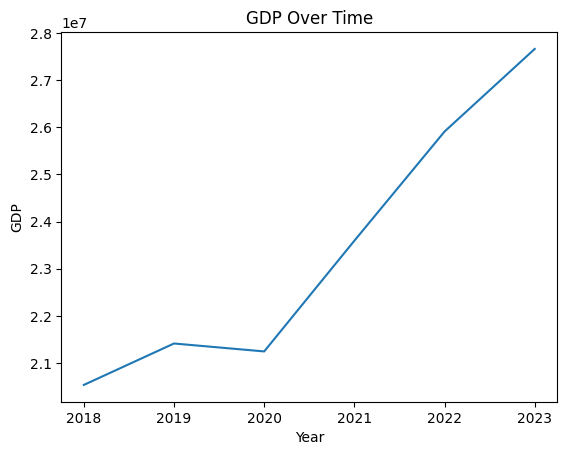

In [ ]:
# Fixing Data Type for GDP
merged_data["GDP"] = (
    merged_data["GDP"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(float)
)

# Grouping GDP data by year
gdp_year = (
    merged_data.groupby("Year", as_index=False)["GDP"]
      .sum()
)

# Plotting the the trend in National GDP

import matplotlib.pyplot as plt

plt.figure()
plt.plot(gdp_year["Year"], gdp_year["GDP"])
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP Over Time")
plt.show()

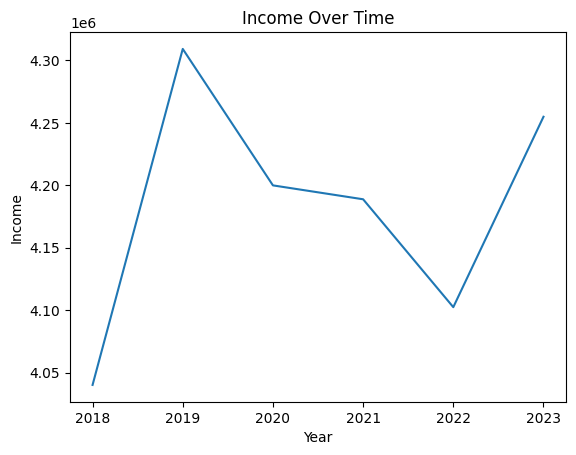

In [ ]:
# Fixing Data Type for income
merged_data["Household_Income"] = (
    merged_data["Household_Income"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(float)
)

# Grouping GDP data by year
income_year = (
    merged_data.groupby("Year", as_index=False)["Household_Income"]
      .sum()
)

# Plotting the the trend in National GDP

import matplotlib.pyplot as plt

plt.figure()
plt.plot(income_year["Year"], income_year["Household_Income"])
plt.xlabel("Year")
plt.ylabel("Income")
plt.title("Income Over Time")
plt.show()

# Spatial Analysis

### Data Preparation for Spatial Analysis

In [ ]:
# Getting polygon mapping data from GEOJSON
import geopandas as gpd

geojson_url = "https://raw.githubusercontent.com/AndreiKingsley/datasets/refs/heads/main/USA.json"

# Loading US states polygons
states = gpd.read_file(geojson_url)

print(states.head())

   id        name                                           geometry
0  01     Alabama  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...
1  02      Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  04     Arizona  POLYGON ((-109.0425 37.00026, -109.04798 31.33...
3  05    Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  06  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...


In [ ]:
# Merging the counts and spatial data
states = states.merge(
    state_counts,
    left_on="name",
    right_on="state",
    how="left"
)
print(states.head())

   id        name                                           geometry  \
0  01     Alabama  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...   
1  02      Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...   
2  04     Arizona  POLYGON ((-109.0425 37.00026, -109.04798 31.33...   
3  05    Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...   
4  06  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...   

        state  brewery_count  
0     Alabama            3.0  
1         NaN            NaN  
2     Arizona            1.0  
3         NaN            NaN  
4  California           18.0  


In [ ]:
# Replace NaNs with 0
states["brewery_count"] = states["brewery_count"].fillna(0)
print(states.head())

   id        name                                           geometry  \
0  01     Alabama  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...   
1  02      Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...   
2  04     Arizona  POLYGON ((-109.0425 37.00026, -109.04798 31.33...   
3  05    Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...   
4  06  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...   

        state  brewery_count  
0     Alabama            3.0  
1         NaN            0.0  
2     Arizona            1.0  
3         NaN            0.0  
4  California           18.0  


### Spatial Analysis

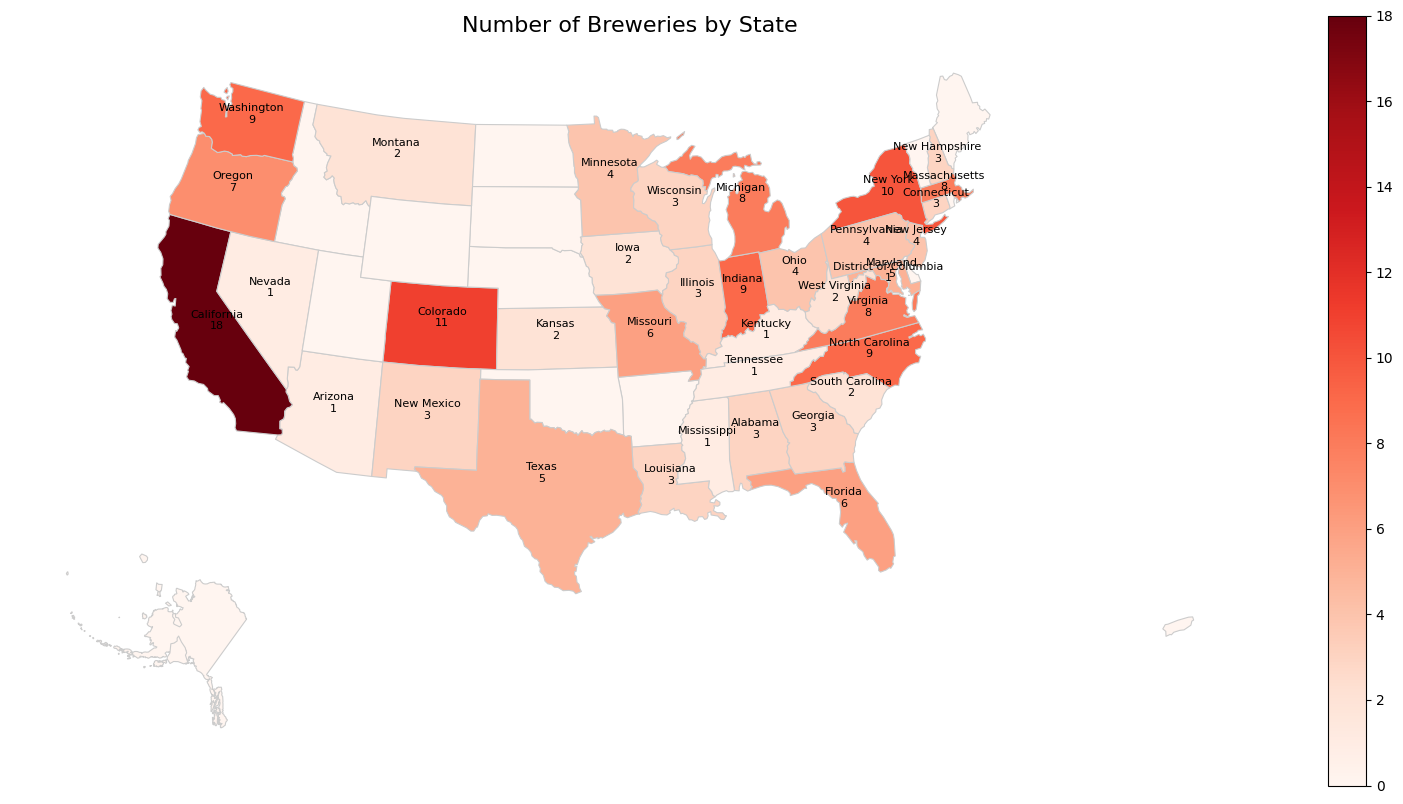

In [ ]:
import matplotlib.pyplot as plt
from shapely.affinity import scale, translate

# Resizing the sizes of the polygons to EPSG:2163 to more reprsentative shape sizes
states_resize = states.to_crs("EPSG:2163")

# Separating Alaska and Hawaii from the contigous (border sharing) American states
alaska = states_resize[states_resize["name"] == "Alaska"].copy()
hawaii = states_resize[states_resize["name"] == "Hawaii"].copy()
contiguous = states_resize[~states_resize["name"].isin(["Alaska", "Hawaii"])]

# Rescaling Alaska
alaska["geometry"] = alaska["geometry"].apply(
    lambda geom: scale(geom, xfact=0.35, yfact=0.35, origin="center")
)
# Moving Alaska to bottom left inset
minx, miny, maxx, maxy = contiguous.total_bounds
alaska["geometry"] = alaska["geometry"].apply(
    lambda geom: translate(
        geom,
        xoff=minx - geom.bounds[0] - 500000,
        yoff=miny - geom.bounds[1] - 500000
    )
)

# Moving Hawaii to bottom right
hawaii["geometry"] = hawaii["geometry"].apply(
    lambda geom: translate(
        geom,
        xoff=minx - geom.bounds[0] - 100000,
        yoff=miny - geom.bounds[1] - 150000
    )
)

# Merging the the three modified datasets
states_modified = contiguous._append(alaska)._append(hawaii)

# Spatial Plot
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
states_modified.plot(
    column="brewery_count",
    cmap="Reds",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True
)
# Adding Lables
for idx, row in states_modified.iterrows():
    if row["brewery_count"] > 0:
        x, y = row.geometry.centroid.coords[0]
        ax.text(
            x, y,
            f"{row['name']}\n{int(row['brewery_count'])}",
            horizontalalignment="center",
            fontsize=8,
            color="black"
        )
ax.set_title("Number of Breweries by State", fontsize=16)
ax.axis("off")
plt.show()


### Distribution of brewery types across the US

In [ ]:
# Count breweries by state and type
grouped = (
    breweries_df.groupby(["state", "brewery_type"])
      .size()
      .reset_index(name="count")
)

print(grouped.head())

     state brewery_type  count
0      ACT        micro      3
1  Alabama      brewpub      1
2  Alabama       closed      2
3  Arizona        micro      1
4     Beja      brewpub      1


In [ ]:
# Brewery Count and Brewery Type Data Distribution

dist_df = grouped.pivot(
    index="state",
    columns="brewery_type",
    values="count"
).fillna(0)

print(dist_df.head())

brewery_type  bar  brewpub  closed  contract  large  micro  nano  planning  \
state                                                                        
ACT           0.0      0.0     0.0       0.0    0.0    3.0   0.0       0.0   
Alabama       0.0      1.0     2.0       0.0    0.0    0.0   0.0       0.0   
Arizona       0.0      0.0     0.0       0.0    0.0    1.0   0.0       0.0   
Beja          0.0      1.0     0.0       0.0    0.0    0.0   0.0       0.0   
Blekinge      0.0      0.0     0.0       0.0    0.0    1.0   0.0       0.0   

brewery_type  proprietor  regional  taproom  
state                                        
ACT                  0.0       0.0      0.0  
Alabama              0.0       0.0      0.0  
Arizona              0.0       0.0      0.0  
Beja                 0.0       0.0      0.0  
Blekinge             0.0       0.0      0.0  


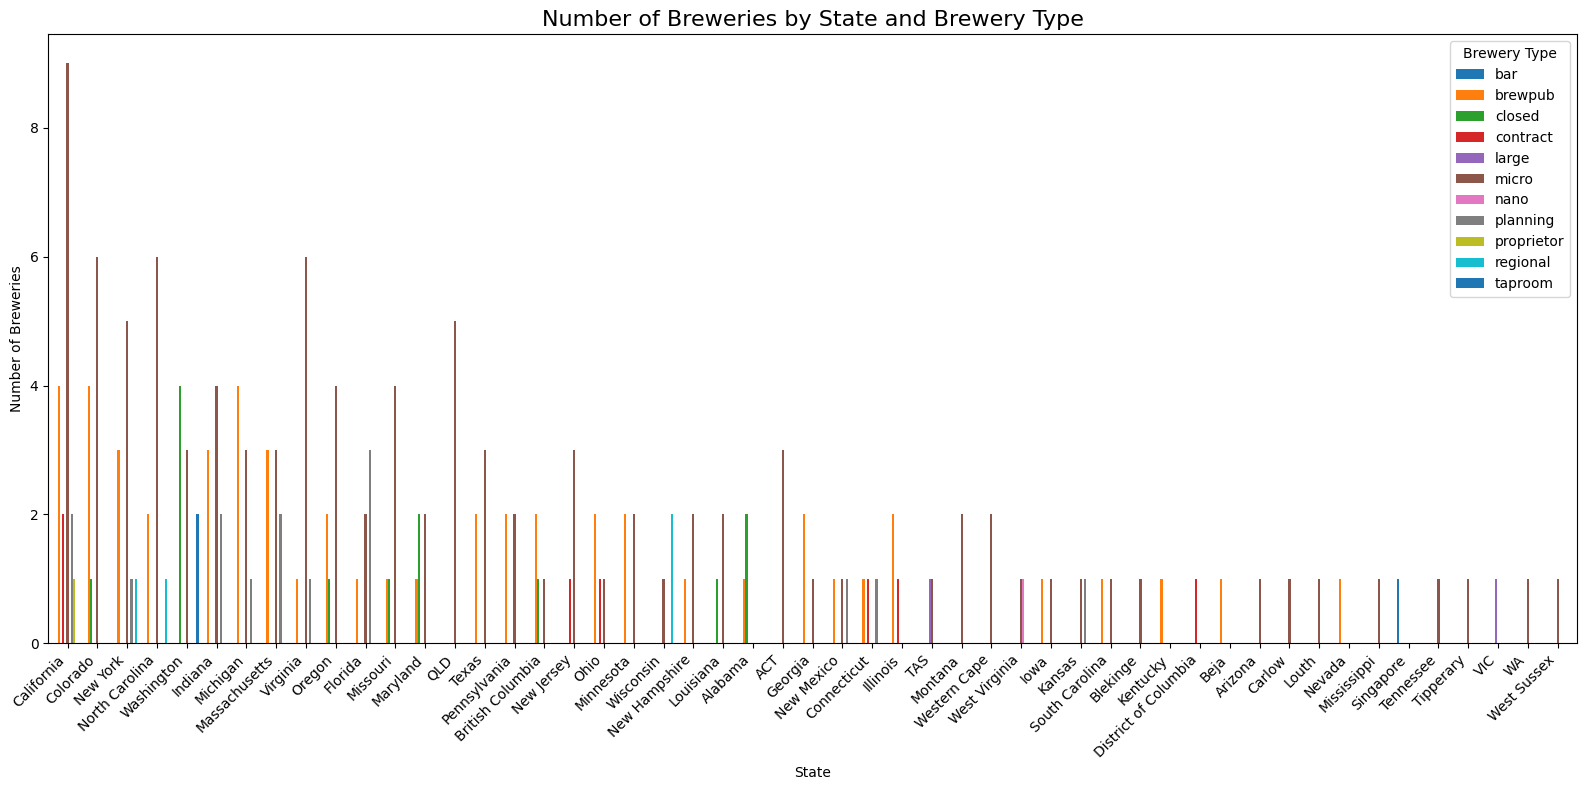

In [ ]:
# Sorting the states by total breweries
dist_df["total"] = dist_df.sum(axis=1)
dist_df = dist_df.sort_values("total", ascending=False).drop(columns="total")

# Plotting Distribution of Data
ax = dist_df.plot(
    kind="bar",
    figsize=(16, 8),
    width=0.8
)

ax.set_title("Number of Breweries by State and Brewery Type", fontsize=16)
ax.set_xlabel("State")
ax.set_ylabel("Number of Breweries")

plt.xticks(rotation=45, ha="right")
plt.legend(title="Brewery Type")
plt.tight_layout()
plt.show()

## Random Intercept Cross-lagged Panel Model (RI-CLPM)

In [ ]:
pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 6.5 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=105189915e6558067399d6321535d5d6869ef4107734b5f62f168d4d5c22f534
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


### Feature Engineering for CLM

In [ ]:
import pandas as pd
from semopy import Model

# Sorting data by State and Year
merged_data = merged_data.sort_values(["State", "Year"])

In [ ]:
# Creating lagged variables per state
merged_data["GDP_lag"] = merged_data.groupby("State")["GDP"].shift(1)
merged_data["Income_lag"] = merged_data.groupby("State")["Household_Income"].shift(1)

In [ ]:
# Data Overview
merged_data.head()

,State,Year,Household_Income,GDP,brewery_count,GDP_lag,Income_lag
0,Alabama,2018,61420.0,226263.8,3,NaN,NaN
51,Alabama,2019,68110.0,234798.2,3,226263.8,61420.0
102,Alabama,2020,65600.0,235859.0,3,234798.2,68110.0
153,Alabama,2021,65360.0,260325.0,3,235859.0,65600.0
204,Alabama,2022,63870.0,286873.3,3,260325.0,65360.0


In [ ]:
# Dropping first year per state (since lag is NaN)
merged_data = merged_data.dropna(subset=["GDP_lag", "Income_lag"])

In [ ]:
# Checking data structure
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 51 to 305
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             255 non-null    object 
 1   Year              255 non-null    object 
 2   Household_Income  255 non-null    float64
 3   GDP               255 non-null    float64
 4   brewery_count     255 non-null    int64  
 5   GDP_lag           255 non-null    float64
 6   Income_lag        255 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 15.9+ KB


In [ ]:
# Correcting the data types for numeric variables
merged_data["GDP"] = merged_data["GDP"].astype(str).str.replace(",", "").astype(float)
merged_data["GDP_lag"] = merged_data["GDP_lag"].astype(str).str.replace(",", "").astype(float)
merged_data["Year"] = merged_data["Year"].astype(int)


In [ ]:
# SEM model specification (RI-CLPM)
# Random intercepts for GDP and Brewery Count
model_desc = """
# Random intercepts
RI_GDP =~ 1*GDP
RI_brewery_count =~ 1*brewery_count

# Cross-lagged effects
GDP ~ a*brewery_count + b*GDP_lag + c*Household_Income
brewery_count ~ d*GDP + e*GDP_lag + f*Household_Income

# Covariances between residuals
GDP ~~ brewery_count
"""

# Initialize model
model = Model(model_desc)

# Fit model
res = model.fit(merged_data)

# Summary of results
estimates = model.inspect()
print(estimates)


                lval  op              rval      Estimate  Std. Err  \
0                GDP   ~            RI_GDP  1.000000e+00         -   
1      brewery_count   ~  RI_brewery_count  1.000000e+00         -   
2                GDP   ~     brewery_count  3.208563e-03   0.00007   
3                GDP   ~           GDP_lag  1.064025e+00  0.047428   
4                GDP   ~  Household_Income -1.192156e-01  1.954303   
5      brewery_count   ~               GDP -4.839430e-06       0.0   
6      brewery_count   ~           GDP_lag  9.853515e-06       0.0   
7      brewery_count   ~  Household_Income  3.504795e-05  0.000011   
8                GDP  ~~     brewery_count -1.887086e-05       0.0   
9                GDP  ~~               GDP  1.836277e+11       0.0   
10            RI_GDP  ~~            RI_GDP  5.000000e-02       0.0   
11  RI_brewery_count  ~~  RI_brewery_count  2.438393e-01   0.27748   
12  RI_brewery_count  ~~            RI_GDP -1.887086e-05       0.0   
13     brewery_count

## Spatial Cross-lagged Panel Models (SCLPM)

### Building Spatial Weights for SCLPM

In [ ]:
# Checking columns of JSON Spatial Data
print(states.columns)

Index(['id', 'name', 'geometry', 'state', 'brewery_count'], dtype='object')


In [ ]:
# Renaming Column
states = states.rename(columns={"name": "State"})

# Removing whitespace in State names
states['State'] = states['State'].str.strip()
merged_data['State'] = merged_data['State'].str.strip()

# Filtering for states in merged data
states = states[states['State'].isin(merged_data['State'].unique())]

# Re-ordering the data
states = states.set_index('State').loc[merged_data['State'].unique()]

In [ ]:
# Building weights using contiguity
from libpysal.weights import Queen

w = Queen.from_dataframe(states)
w.transform = 'r'

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')


/tmp/ipython-input-2540765235.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(states)
/usr/local/lib/python3.12/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1, 11.
  W.__init__(self, neighbors, ids=ids, **kw)


### Feature Engineering for CLM

In [ ]:
# Sorting Panel Data
merged_data['Year'] = pd.to_numeric(merged_data['Year'])
merged_data = merged_data.sort_values(['Year','State'])

In [ ]:
import numpy as np

# Log Tranformation of variables
merged_data['log_GDP'] = np.log(merged_data['GDP'])
merged_data['log_GDP_lag'] = np.log(merged_data['GDP_lag'])
merged_data['log_income'] = np.log(merged_data['Household_Income'])
merged_data['log_income_lag'] = np.log(merged_data['Income_lag'])
merged_data['log_brewery_count'] = np.log(merged_data['brewery_count'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Replacing -inf with 0
merged_data["log_brewery_count"] = merged_data["log_brewery_count"].replace(-np.inf, 0)

In [ ]:
from libpysal.weights import lag_spatial

# computing Lags by Year
merged_data['W_GDP_lag'] = 0
merged_data['W_brewery_count'] = 0

for year in merged_data['Year'].unique():
    mask = merged_data['Year'] == year

    year_data = merged_data.loc[mask].set_index('State').loc[states.index]

    merged_data.loc[mask, 'W_GDP_lag'] = lag_spatial(
        w, year_data['log_GDP_lag']
    )

    merged_data.loc[mask, 'W_brewery_count'] = lag_spatial(
        w, year_data['log_brewery_count']
    )

/tmp/ipython-input-951636996.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[12.91700334  0.         12.68187178 12.70397052 12.40551278 11.86451311
 12.86352016 13.27668259 13.05992061 12.82762815 12.93179258  0.
 11.87695561 12.53386713 13.13128458 12.42485104 12.37388663 12.84520952
 12.60452832 11.33689687 12.22213391 11.93114145 12.99404439 11.69663757
 12.34345763 12.34313996 10.93951368 11.86921862 12.69082224 11.58481501
 13.04119664 12.87606483 12.6204955  12.92857369 11.51833593 12.62498959
 12.54178374 12.86764824 12.75399546 12.88972083 13.28787091 11.53273026
 12.55498197 11.9879889  11.83877785 12.97475881 12.39982118 11.83005248
 13.07275741 12.96202875 11.62239281]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_data.loc[mask, 'W_GDP_lag'] = lag_spatial(
/tmp/ipython-input-951636996.py:16: FutureWarning: Setting an item of incompatibl

In [ ]:
# Checking new data variables
merged_data.head()

,State,Year,Household_Income,GDP,brewery_count,GDP_lag,Income_lag,log_GDP,log_GDP_lag,log_income,log_income_lag,log_brewery_count,W_GDP_lag,W_brewery_count
51,Alabama,2019,68110.0,234798.2,3,226263.8,61420.0,12.366482,12.329457,11.128879,11.025491,1.098612,12.917003,0.722593
52,Alaska,2019,95010.0,54549.6,0,54762.0,84540.0,10.906866,10.910752,11.461737,11.344980,0.000000,0.000000,0.000000
53,Arizona,2019,85650.0,375376.7,1,353671.0,76600.0,12.835685,12.776122,11.358025,11.246352,0.000000,12.681872,1.277376
54,Arkansas,2019,66100.0,132625.8,0,129213.8,61230.0,11.795287,11.769224,11.098924,11.022393,0.000000,12.703971,0.749968
55,California,2019,94660.0,3068629.7,18,2899530.9,86690.0,14.936742,14.880060,11.458047,11.370094,2.890372,12.405513,0.648637


### SCLPM Model

In [ ]:
from semopy import Model

# SEM model specification (SCLPM)
# Spatial Cross-lagged Panel Models (SCLPM)
model_desc = """
log_GDP ~ a*log_GDP_lag + b*log_income_lag + c*W_GDP_lag + d*W_brewery_count + e*brewery_count
"""

# Initialize Model
model = Model(model_desc)\

# Fitting Model
model.fit(merged_data)

# Summary of Results
print(model.inspect())

      lval  op             rval  Estimate  Std. Err     z-value   p-value
0  log_GDP   ~      log_GDP_lag  1.010855  0.006647  152.072660  0.000000
1  log_GDP   ~   log_income_lag -0.021456  0.029347   -0.731123  0.464704
2  log_GDP   ~        W_GDP_lag  0.002704  0.002475    1.092278  0.274711
3  log_GDP   ~  W_brewery_count -0.017190  0.013259   -1.296486  0.194808
4  log_GDP   ~    brewery_count -0.002396  0.001914   -1.251854  0.210623
5  log_GDP  ~~          log_GDP  0.005252  0.000465   11.291590  0.000000


## Arellano-Bond Difference Generalized Method of Moments (GMM)

In [ ]:
pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 8.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from linearmodels.iv import IVGMM

# Set multi-index (required for panel GMM) and sorting data
merged_data_mi = merged_data.set_index(["State", "Year"])
merged_data_mi = merged_data_mi.sort_index()

# Getting lag 2 for dependent variable
merged_data_mi["log_GDP_lag2"] = (
    merged_data_mi.groupby(level=0)["log_GDP"].shift(2)
)

# Getting First Difference
data_diff = merged_data_mi.groupby(level=0).diff()

# Combining differenced variables with instrument in one dataframe
gmm_data = pd.concat([
    data_diff["log_GDP"],
    data_diff["log_GDP_lag"],
    data_diff[[
        "log_income",
        "brewery_count",
        "W_GDP_lag",
        "W_income_lag"
    ]],
    merged_data_mi["log_GDP_lag2"]
], axis=1).dropna()

# Removing columns with no variation (fixes rank issue)
gmm_data = gmm_data.loc[:, gmm_data.std() > 0]

# Initializing Variables
# Dependent variable
y = gmm_data["log_GDP"]

# Endogenous regressor
endog = gmm_data["log_GDP_lag"]

# Exogenous variables (differences)
exog_vars = ["log_income", "brewery_count", "W_GDP_lag", "W_income_lag"]
exog_vars = [v for v in exog_vars if v in gmm_data.columns]
exog = gmm_data[exog_vars]

# Aligning instrument to differenced dataframe
instruments = gmm_data["log_GDP_lag2"]

# Estimating GMM Model
model = IVGMM(
    dependent=y,
    exog=exog,
    endog=endog,
    instruments=instruments
)

results = model.fit(cov_type="robust")

print(results.summary)


                          IV-GMM Estimation Summary                           
Dep. Variable:                log_GDP   R-squared:                     -140.95
Estimator:                     IV-GMM   Adj. R-squared:                -144.76
No. Observations:                 153   F-statistic:                    1.8069
Date:                Tue, Feb 17 2026   P-value (F-stat)                0.7712
Time:                        03:38:39   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
log_income      -0.9022     1.5848    -0.5693     0.5692     -4.0082      2.2039
W_GDP_lag       -33.536     70.473    -0.475